# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [18]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /Users/tranthithuphuong/Desktop/My-DAC-Curriculum/DAC-006_Machine_Learning


In [19]:
# Import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler



In [ ]:
# Read our data into a dataframe
df = pd.read_csv('datasets/data.csv')

df.shape

(6819, 96)

In [34]:
df.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [35]:
df.columns

Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit 

In [23]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [24]:
df.isnull().sum() #Detect missing values for an array-like object

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Number of bankrupt vs non-bankrupt

In [36]:
df['Bankrupt'].value_counts()

Bankrupt
0    6599
1     220
Name: count, dtype: int64

In [26]:
# rename 'Bankrupt?' to 'Bankrupt'
df.rename(columns={'Bankrupt?': 'Bankrupt'},inplace=True, errors='raise')

In [27]:
# Separate features and target
x = df.drop('Bankrupt', axis=1)  # All features except the target
y = df['Bankrupt']               # Target feature

In [ ]:
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and test data
x_test_scaled = scaler.fit_transform(x)


# Split the dataset into training and test data
# test_size = 0.2: 20% of my sample is test data
# stratify = y: try to evenly distribute the values of y in each split
x_train, x_test, y_train, y_test = train_test_split(x_test_scaled, y, test_size=0.2, random_state=42, stratify=y)

x_train_scaled = scaler.fit_transform(x_train)

In [29]:
# Create Proximity matrix
# normalize = 0: pm / n_tree
# normalize ≠ 0: Normalize columns to sum to 1
def proximity_matrix(model, x, normalize=0):
    n_tree = len(model.estimators_)
    
    # Apply trees in the forest to X, return leaf indices.
    leaf = model.apply(x)  # shape = (x.shape[0], n_tree)
    
    pm = np.zeros(shape=(x.shape[0], x.shape[0]))
    for i in range(n_tree):
        t = leaf[:, i]
        pm += np.equal.outer(t, t) * 1.

    np.fill_diagonal(pm, 0)    
    if normalize == 0:
        return pm / n_tree
    else:
        return pm / pm.sum(axis=0, keepdims=True)

In [30]:
# n_estimators: no. of decision trees in the forest
n_estimators = 50
n_depth = 5

# Missing value imputation using the proximity matrix
for i in range(5):   # 5 iterations, training 5 times
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=n_depth,
                                   oob_score=True)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, oob_score=True)

In [31]:
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=n_depth, oob_score=True)
model.fit(x_train, y_train)  # Train on the imputed data

x_data = np.vstack([x_train, x_test])  # Combine training and test data
pm = proximity_matrix(model, x_data, normalize=1)  # Calculate proximity matrix for combined data


In [ ]:
# regularization constant (strength)
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C := inverse of regularization strength
model = LogisticRegression(penalty = 'l2',C=1/REG_CONST, max_iter = 300)
model.fit(x_train_scaled, y_train)
# Predict the classes of test data and measure the accuracy of test data
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean()
print('\nAccuracy of test data = {:.3f}'.format(acc))

ValueError: ('Lengths must match to compare', (1364,), (6819,))

In [ ]:
# Check lengths
print(f"Length of y_test: {len(y_test)}")
# Get prediction probabilities
y_pred_proba = model.predict_proba(x_test_scaled)[:,1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
roc_auc = auc(fpr,tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Length of y_test: 1364


ValueError: Found input variables with inconsistent numbers of samples: [1364, 6819]

In [ ]:
# Get prediction probabilities
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1364, 6819]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv("datasets/data.csv")  # Replace with your file path

# Define features and target
X = data.drop(columns=["Bankrupt?"])
y = data["Bankrupt?"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate F1 score and accuracy
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate t-score (difference in true positive and false positive rates)
t_score = (tp / (tp + fn)) - (fp / (fp + tn))

# Print metrics
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("T-Score:", t_score)
print("Confusion Matrix:\n", conf_matrix)

# Proximity matrix calculation
# Extract leaf indices for all data points
leaf_indices = rf.apply(X_test)

# Calculate proximity matrix (shared leaf counts)
n_samples = leaf_indices.shape[0]
proximity_matrix = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in range(n_samples):
        # Proximity is the fraction of trees where samples share the same leaf
        proximity_matrix[i, j] = np.mean(leaf_indices[i] == leaf_indices[j])

print("Proximity Matrix Shape:", proximity_matrix.shape)


F1 Score: 0.30952380952380953
Accuracy: 0.9716520039100685
T-Score: 0.19444444444444445
Confusion Matrix:
 [[1975    5]
 [  53   13]]
Proximity Matrix Shape: (2046, 2046)


c:\Users\acer\Desktop\My-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


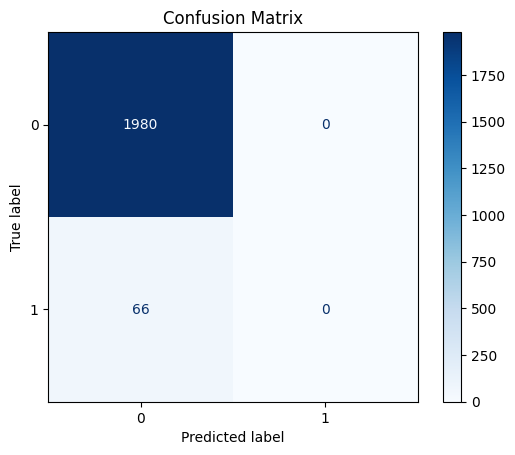

Confusion Matrix:
 [[1980    0]
 [  66    0]]


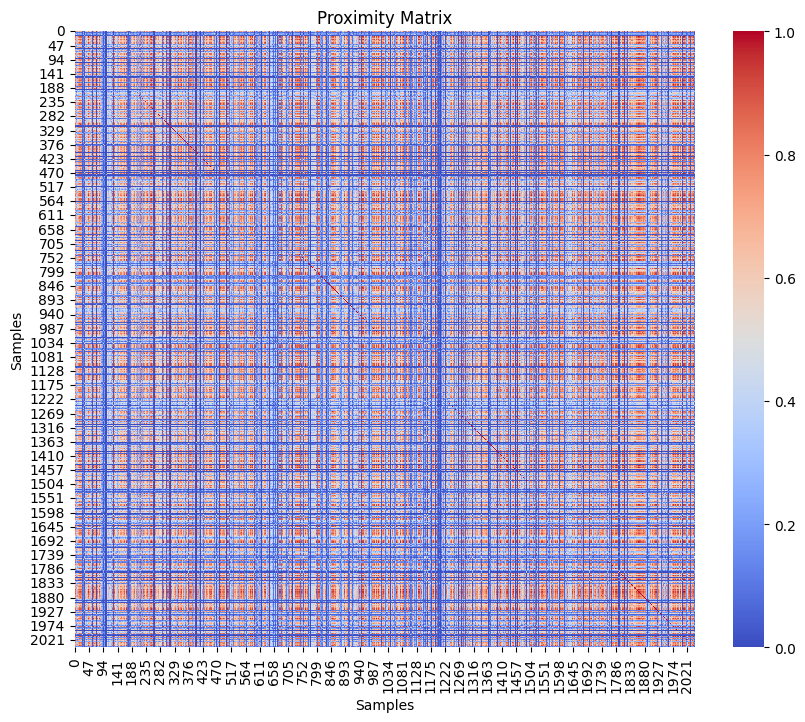

In [ ]:
# Plot the confusion matrix
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:\n", cm)


# Plot the proximity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(proximity_matrix, cmap='coolwarm', cbar=True)
plt.title("Proximity Matrix")
plt.xlabel("Samples")
plt.ylabel("Samples")
plt.show()